<h1 style='color:Green'>Enterprise Intelligent Demand Forecasting & Decision Optimization Platform</h1>

<h3>📌 Project Overview</h3>
<pre>
This project focuses on building an <b>end-to-end time series forecasting system</b> to predict daily grocery sales for different product families across multiple stores of the Favorita retail chain in Ecuador. The goal is to leverage historical sales data along with external factors such as promotions, holidays, and oil prices to accurately forecast future demand.
</pre>
<h3>🎯 Project Objective</h3>
<pre>The main objectives of this project are:
    - To analyze historical sales patterns and seasonality
    - To build machine learning and deep learning models for sales forecasting
    - To improve forecast accuracy using feature engineering and external data
    - To support better business decisions such as inventory planning and demand management
</pre>
<h3>📈 Business Impact</h3>
<pre>Accurate demand forecasting helps retailers:
    - Reduce stock-outs and over-stocking
    - Optimize inventory and supply chain operations
    - Improve sales planning during promotions and holidays
    - Make data-driven decisions that reduce cost and increase efficiency</pre>
<h3>🧠 Learning Outcome</h3>
<pre>
Through this project, we cover the complete machine learning lifecycle including data preprocessing, feature engineering, model training, evaluation, optimization, and deployment.
</pre>

<h2 style='color:purple'>Environment Setup</h2>

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from pathlib import Path 
import warnings
warnings.filterwarnings("ignore")

<h2 style='color:purple'>Define Project path</h2>

In [2]:
# Define project path
PROJECT_ROOT = Path.cwd().parent 
DATA_PATH = PROJECT_ROOT / "data" / "raw"

DATA_PATH

PosixPath('/home/sabin/Desktop/ml/demand_forecasting/data/raw')

<h2 style='color:purple'>Load All Datasets</h2>

In [3]:
# Train Dataset
train = pd.read_csv(DATA_PATH / "train.csv", parse_dates=['date'])
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
# Test Dataset
test = pd.read_csv(DATA_PATH / "test.csv", parse_dates=['date'])
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
# Store metadata 
stores = pd.read_csv(DATA_PATH / "stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
# Oil Prices 
oil = pd.read_csv(DATA_PATH / "oil.csv", parse_dates=['date'])
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
# Holidays Events 
holidays = pd.read_csv(DATA_PATH / "holidays_events.csv", parse_dates=['date'])
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


<h2 style='color:purple'>Basic Data Inspection</h2>

In [8]:
# Shape of each dataset 
datasets = {
    "train": train, 
    "test": test, 
    "stores": stores, 
    "oil": oil, 
    "holidays": holidays
}

for name, df in datasets.items():
    print(f"{name.upper():<10} shape: {df.shape}")

TRAIN      shape: (3000888, 6)
TEST       shape: (28512, 5)
STORES     shape: (54, 5)
OIL        shape: (1218, 2)
HOLIDAYS   shape: (350, 6)


In [9]:
# column names and data types 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [10]:
# missing values 
for names, df in datasets.items():
    print(f"\n{names.upper()} missing values: ")
    print(df.isna().sum())


TRAIN missing values: 
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

TEST missing values: 
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

STORES missing values: 
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

OIL missing values: 
date           0
dcoilwtico    43
dtype: int64

HOLIDAYS missing values: 
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


<h2 style='color:purple'>Train vs Test time range Validation 
</h2>

In [11]:
print("Train Date Range:")
print(train['date'].min(), "-", train['date'].max())

print("\nTest Date Range:")
print(test['date'].min(), "-", test['date'].max())

Train Date Range:
2013-01-01 00:00:00 - 2017-08-15 00:00:00

Test Date Range:
2017-08-16 00:00:00 - 2017-08-31 00:00:00


<h2 style='color:purple'>Quick sanity check</h2>

In [12]:
# check for negative sales 
print("Total Negative Sales: ", (train['sales'] < 0).sum())

Total Negative Sales:  0


In [13]:
# unique counts 
print("Number of Stores: ", train['store_nbr'].nunique())
print("Number of Product Family: ", train['family'].nunique())
print("Total time Series: ", train['store_nbr'].nunique() * train['family'].nunique())

Number of Stores:  54
Number of Product Family:  33
Total time Series:  1782


<h2 style='color:purple'>Merge Store Metadata</h2>

In [14]:
# Merge Store Metadata 
train_merged = train.merge(stores, on="store_nbr", how="left")
train_merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


<h2 style='color:purple'>EXPLORATORY DATA ANALYSIS (EDA)</h2>
<pre>🎯 Goals of EDA
    - Understand sales behavior over time
    - Detect trend, seasonality, volatility
    - Quantify promotion, holiday, oil, and earthquake effects
    - Identify modeling risks (zeros, skewness)</pre>

<h2 style='color:purple'>Target Variable Analysis</h2> 


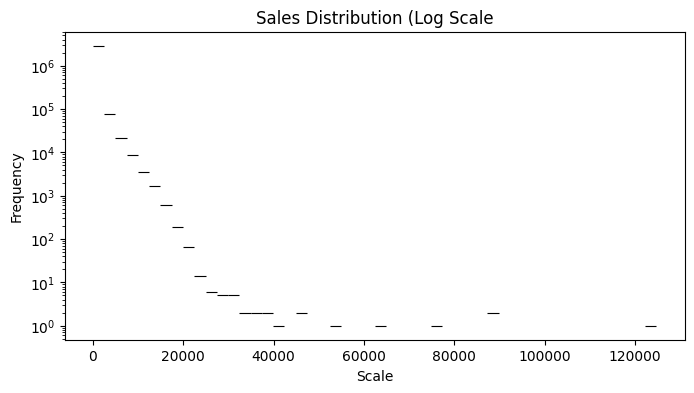

In [15]:
# Sales Distribution 
plt.figure(figsize=(8, 4))
sns.histplot(train['sales'], bins=50, log_scale=(False, True)) 
plt.title("Sales Distribution (Log Scale")
plt.xlabel("Scale")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Zero Sales Percentage
zero_sales_pct = (train["sales"] == 0).mean() * 100
zero_sales_pct

31.29506999261552

<h2 style='color:purple'>Time Series and Trend & Sesonality 
</h2>

[]

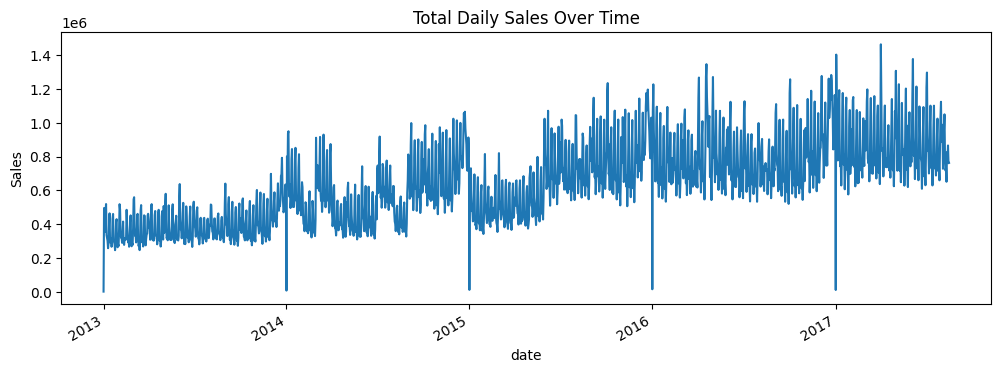

In [17]:
# Total Sales over time 
daily_sales = train.groupby('date')['sales'].sum()

plt.figure(figsize=(12, 4))
daily_sales.plot()
plt.title('Total Daily Sales Over Time')
plt.ylabel("Sales")
plt.plot()

[]

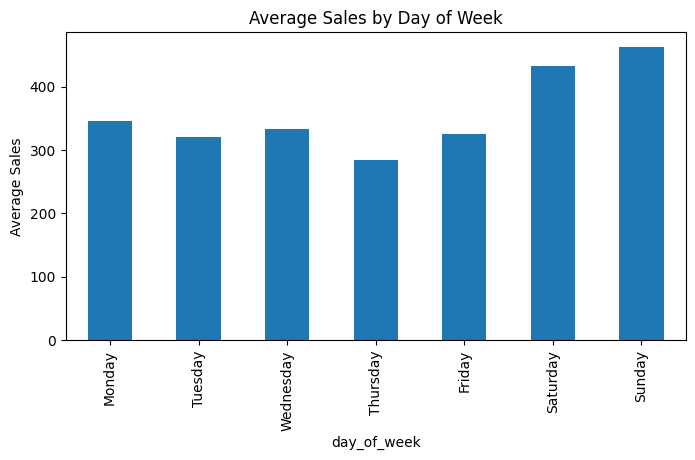

In [18]:
# Weekly Seaionality
train["day_of_week"] = train['date'].dt.day_name()
dow_sales = train.groupby('day_of_week')['sales'].mean()
dow_sales = dow_sales.reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

dow_sales.plot(kind='bar', figsize=(8, 4))
plt.title("Average Sales by Day of Week")
plt.ylabel("Average Sales")
plt.plot()

<h2 style='color:purple'>Store and product behaviour 
</h2>

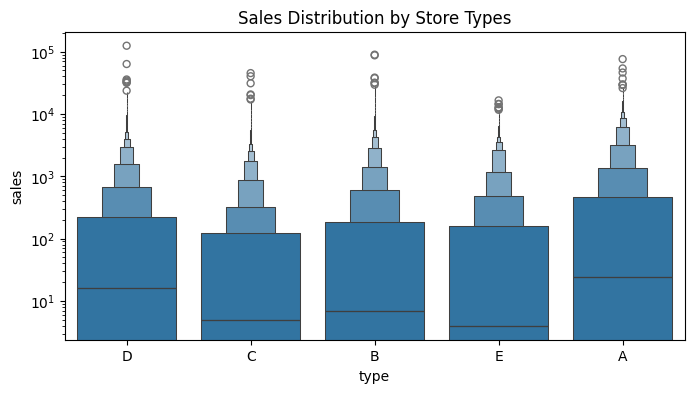

In [19]:
# Sales by Store Type 
train_store = train.merge(stores, on="store_nbr")

plt.figure(figsize=(8, 4))
sns.boxenplot(x='type', y='sales', data=train_store)
plt.yscale('log')
plt.title("Sales Distribution by Store Types")
plt.show()

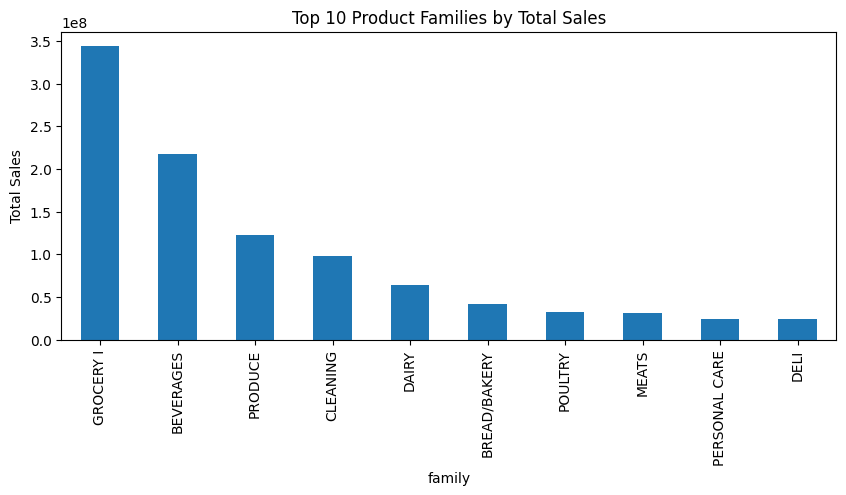

In [20]:
# Sales by product Family
top_families = (
    train.groupby('family')['sales'].sum().sort_values(ascending=False).head(10)
)
top_families.plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Product Families by Total Sales")
plt.ylabel('Total Sales')
plt.show()

<h2 style='color:purple'>Promotion Impact Analysis 
</h2>

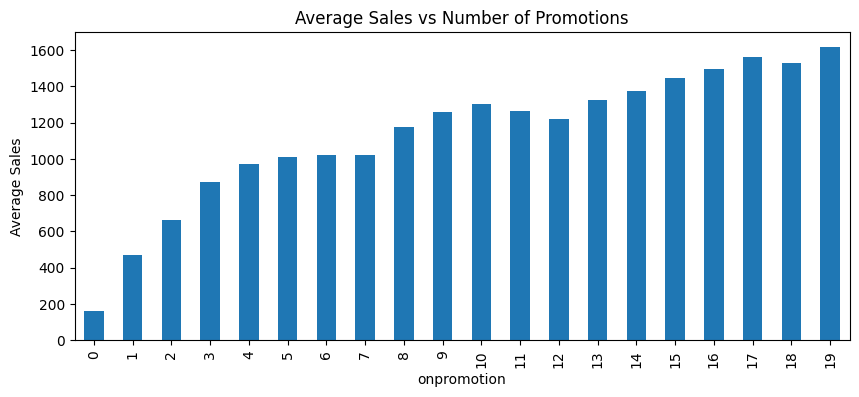

In [21]:
# Sales vs Promotion 
promo_sales = train.groupby("onpromotion")['sales'].mean().head(20)

promo_sales.plot(kind='bar', figsize=(10, 4))
plt.title("Average Sales vs Number of Promotions")
plt.ylabel("Average Sales")
plt.show()

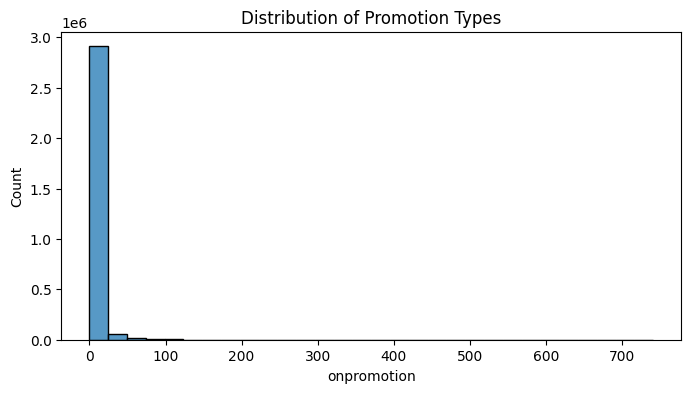

In [22]:
# Promotion Frequency
plt.figure(figsize=(8, 4))
sns.histplot(train['onpromotion'], bins=30)
plt.title('Distribution of Promotion Types')
plt.show()

<h2 style='color:purple'>Oil Price Impact 
</h2>

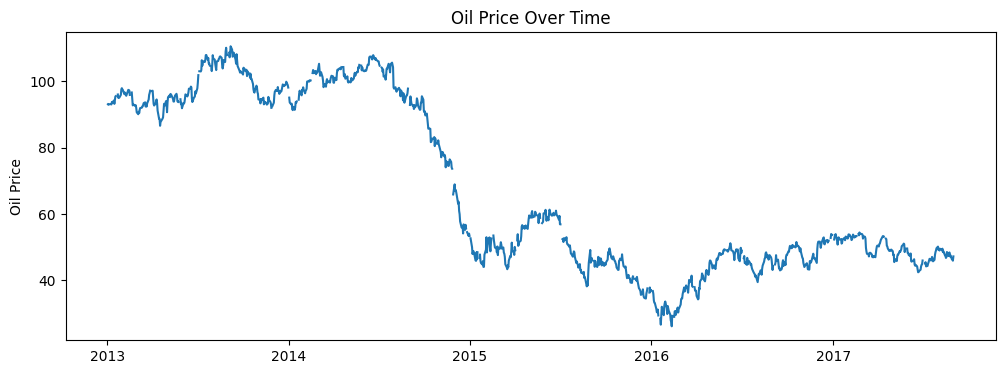

In [23]:
# Oil Price Trend 
plt.figure(figsize=(12, 4))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title('Oil Price Over Time')
plt.ylabel('Oil Price')
plt.show()

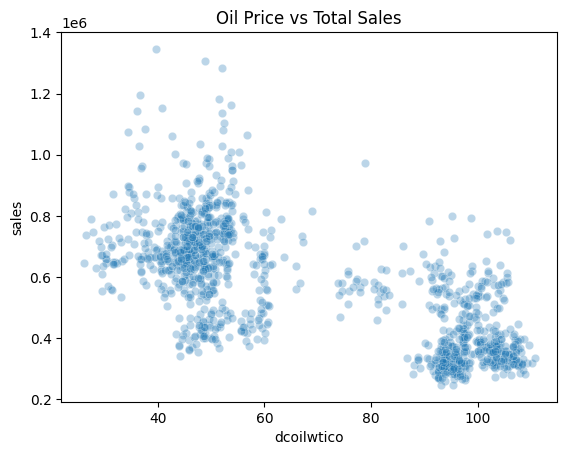

In [24]:
# Oil price vs Sals 
oil_sales = (train.groupby(
    'date')['sales'].sum()
    .to_frame()
    .merge(oil, on='date', how='left')
)

sns.scatterplot(x='dcoilwtico', y='sales', data=oil_sales, alpha=0.3)
plt.title("Oil Price vs Total Sales")
plt.show()

<h2 style='color:purple'>Holidays and Event Analysis 
</h2>

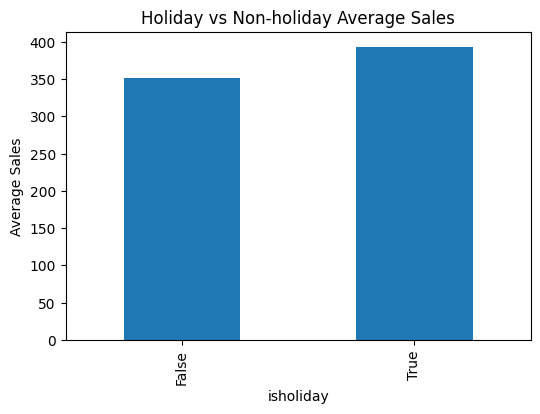

In [25]:
# Holiday vs Non-holiday Sales
train_holiday = train.merge(holidays[['date', 'type']], on='date', how='left')

train_holiday['isholiday'] = train_holiday['type'].notna()
holidays_sales = train_holiday.groupby("isholiday")['sales'].mean()

holidays_sales.plot(kind='bar', figsize=(6, 4))
plt.title("Holiday vs Non-holiday Average Sales")
plt.ylabel("Average Sales")
plt.show()

<h2 style='color:purple'>Earthquake Impact 
</h2>

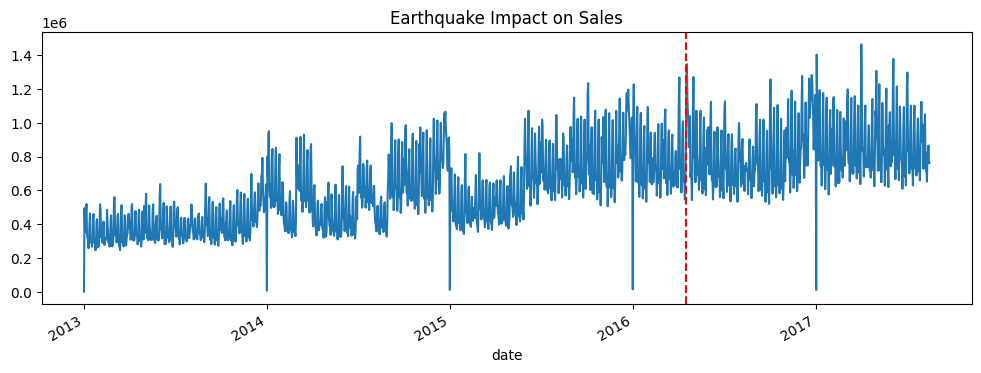

In [26]:
# Earthquake Effect Visualization 
earthquake_date = pd.to_datetime("2016-04-16")

plt.figure(figsize=(12, 4))
daily_sales.plot()
plt.axvline(earthquake_date, color='red', linestyle='--')
plt.title("Earthquake Impact on Sales")
plt.show()